HW #3: Exercise 5.5

In [2]:
class particle(object):  ## We recycle our 1D particle object
    
    def __init__(self, mass=1., x=0., v=0.):
        self.mass = mass
        self.f = 0
        self.x= x
        self.v = v
        
    def move(self, dt):
        # Euler-Cromer
        self.v = self.v + self.f/self.mass*dt
        self.x = self.x + self.v*dt
        
class CoupledSystem(object):

    def __init__(self, N, k, kc, dt): 
        self.N = N
        self.dt = dt
        self.k = k
        self.kc = kc
        self.particles = [particle()]
        for i in range(1,N):
            self.particles.append(particle()) # we create a list of N particles

    def evolve(self):        
        # Compute the interaction forces with the other particles
        for i in range(self.N-1):
            self.particles[i].f = self.kc*(self.particles[i+1].x + self.particles[i-1].x - 2*self.particles[i].x)
        self.particles[0].f = self.kc*(self.particles[1].x - self.particles[0].x) - self.k*self.particles[0].x
        self.particles[N-1].f = self.kc*(self.particles[N-2].x - self.particles[N-1].x) - self.k*self.particles[N-1].x

        for p in self.particles:
            p.move(dt)
            
    def energy(self):
        # Challenge
        return (ke,pe)


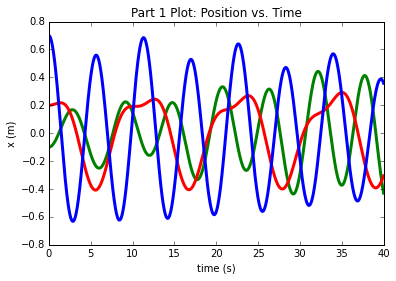

In [20]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = -0.1
S.particles[1].x = 0.2
S.particles[2].x = 0.7

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color='blue', ls='-', lw=3)

pyplot.xlabel('time (s)')
pyplot.ylabel('x (m)');
pyplot.title('Part 1 Plot: Position vs. Time')

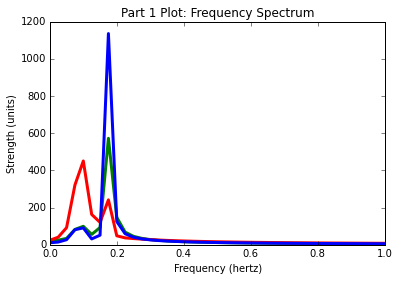

In [19]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)
pyplot.xlim(0,1);

pyplot.xlabel('Frequency (hertz)')
pyplot.ylabel('Strength (units)');
pyplot.title('Part 1 Plot: Frequency Spectrum')

The time dependence of the motion of the particles can be explain with  few words: they are a result of two different modes factoring in. There are two different spring constants ($k$ and $k_c$), and each spring constant generates one mode (or frequency). The behavior of the particles is a summation of the two modes. The middle particle, particle 1, is attached to only $k_c$ springs, which means its behavior will mostly be influenced by the $k_c$ mode. On the other hand, particles 0 and 2 will be mostly influenced by the $k$ mode.

The relative strength of the two modes is determined by the initial conditions. If the initial starting position for the particles 0 and 2 is very large realtive to 1, then the $k$ modes will dominate. On the other hand, if the initial positions as small compared to particle 1, then the $k_c$ modes will dominate.

We know which modes will dominate by the frequency spectrum. It can be seen that the red plot has a more even distribution of $k$ and $k_c$ modes compared to blue and green. This makes sense because red corresponds to particle 1, which only has $k_c$ springs attached. Particles 0 and 2 have both $k$ and $k_c$ springs, so they will have more energy in the k mode.

Blue has the most energy because it had the largest initial displacement. It was given the most initial energy. The energy was mostly in the $k$ spring. This is why the $k$ mode peak is the highest.

#----------------------------------------------------------------------

Question/Part 2 Below:

In [29]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.5
S.particles[1].x = 0.
S.particles[2].x = -0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

x1 = np.zeros(shape=(N,nsteps))
x2 = np.zeros(shape=(N,nsteps))
x3 = np.zeros(shape=(N,nsteps))

x3 = x

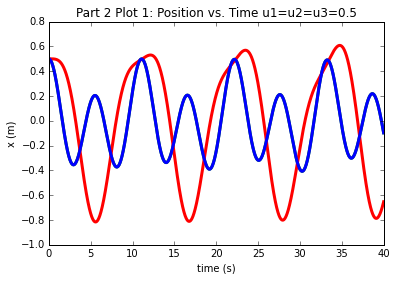

In [23]:
pyplot.plot(t, x1[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x1[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x1[2,], color='blue', ls='-', lw=3)

pyplot.xlabel('time (s)')
pyplot.ylabel('x (m)');
pyplot.title('Part 2 Plot 1: Position vs. Time u1=u2=u3=0.5')

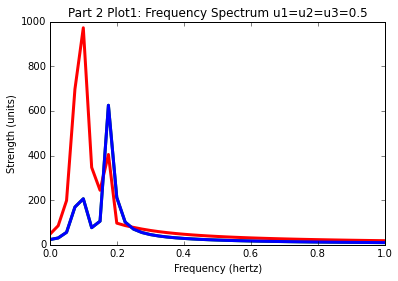

In [24]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x1[0,])
u1 = np.fft.rfft(x1[1,])
u2 = np.fft.rfft(x1[2,])

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)
pyplot.xlim(0,1);

pyplot.xlabel('Frequency (hertz)')
pyplot.ylabel('Strength (units)');
pyplot.title('Part 2 Plot1: Frequency Spectrum u1=u2=u3=0.5')

Part 2 Plot 1 Answer: The two normal mode frequencies are ~0.7 hertz and 1.6 hertz. These were found by looking at the two tallest peaks in graph above, as well as solving the following equation: $$f = (\frac{k}{m2\pi})^{\frac{1}{2}}$$

We know $k=1.$, $k_c = 0.2$, and $m = 1.$.

The plot shows that the $k$ mode has the most energy. Additionally, the green plot of particle 0 cannot be seen because the blue plot is covering it up. This is because the initial conditions and the spring constant of particles 0 and 2 were identical, so they will have identical responses.

#-----------------------------------------

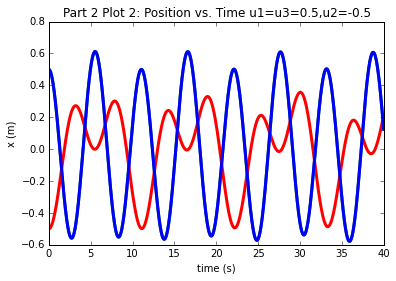

In [26]:
pyplot.plot(t, x2[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x2[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x2[2,], color='blue', ls='-', lw=3)

pyplot.xlabel('time (s)')
pyplot.ylabel('x (m)');
pyplot.title('Part 2 Plot 2: Position vs. Time u1=u3=0.5,u2=-0.5')

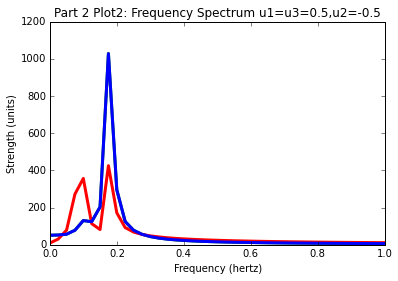

In [28]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x2[0,])
u1 = np.fft.rfft(x2[1,])
u2 = np.fft.rfft(x2[2,])

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)
pyplot.xlim(0,1);

pyplot.xlabel('Frequency (hertz)')
pyplot.ylabel('Strength (units)');
pyplot.title('Part 2 Plot 2: Frequency Spectrum u1=u3=0.5,u2=-0.5')

Part 2 Plot 2 Answer: The two normal mode frequencies are ~0.7 hertz and 1.6 hertz. These were found by looking at the two tallest peaks in graph above, as well as solving the following equation: $$f = (\frac{k}{m2\pi})^{\frac{1}{2}}$$

We know $k=1.$, $k_c = 0.2$, and $m = 1.$.

The plot shows that the $k_c$ mode has the most energy. Additionally, the green plot of particle 0 cannot be seen because the blue plot is covering it up. This is because the initial conditions and the spring constant of particles 0 and 2 were identical, so they will have identical responses.

#----------------------------------------

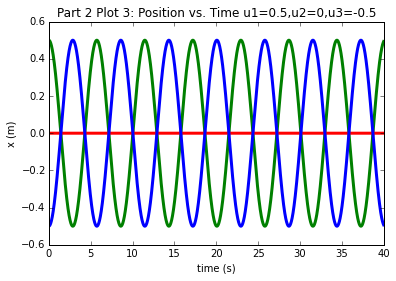

In [30]:
pyplot.plot(t, x3[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x3[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x3[2,], color='blue', ls='-', lw=3)

pyplot.xlabel('time (s)')
pyplot.ylabel('x (m)');
pyplot.title('Part 2 Plot 3: Position vs. Time u1=0.5,u2=0,u3=-0.5')

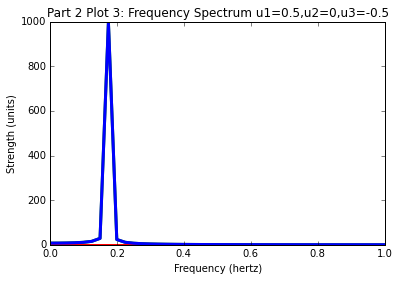

In [31]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x3[0,])
u1 = np.fft.rfft(x3[1,])
u2 = np.fft.rfft(x3[2,])

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)
pyplot.xlim(0,1);

pyplot.xlabel('Frequency (hertz)')
pyplot.ylabel('Strength (units)');
pyplot.title('Part 2 Plot 3: Frequency Spectrum u1=0.5,u2=0,u3=-0.5')

Part 2 Plot 3 Answer: The two normal mode frequencies are ~0.7 hertz and 1.6 hertz. These were found by looking at the two tallest peaks in graph above, as well as solving the following equation: $$f = (\frac{k}{m2\pi})^{\frac{1}{2}}$$

We know $k=1.$, $k_c = 0.2$, and $m = 1.$.

However, the $k$ normal mode cannot be seen. This is because particle 1 was not given any initial energy, and the starting positions of particles 0 and 2 were identical, with the exception of their signs. This caused the two forces exerted on particle 1 to cancel out, so particle 1 felt no net force. As a result, almost all the energy was stored in the $k_c$ springs.

The green plot of particle 0 cannot be seen because the blue plot is covering it up. This is because the magnitude of the initial conditions and the spring constants of particles 0 and 2 were identical, so they will have identical responses.

#-----------------------------------------

### Exercise 5.5: three coupled oscillators 

1.  Run the program with $N=3$, $k_{c}=0.2$ and $k=1$ and arbitrary but
    nonzero initial displacements. Describe the time-dependence of the
    motion of the particles.

2.  Consider the following initial conditions:
    ${u_{1}=u_{2}=u_{3}=0.5}$, ${u_{1}=0.5,u_{2}=-0.5,u_{3}=0.5}$,
    ${u_{1}=0.5,u_{2}=0,u_{3}=-0.5}$ (all the velocities are
    initially zero) If these initial conditions correspond to normal
    modes, determine the normal modes frequencies.

3.  Add an external driving force to particle 1 and determine the normal
    mode frequencies. Compare your results with the frequencies you
    obtained in part 2. How many normal modes are there?